#### **Credit Card Fraud Detection Machine Learning by Abiola David**

![CreditCard](https://th.bing.com/th/id/OIP.ohR0PVijAHyPkrsF_AuNcwAAAA?pid=ImgDet&w=172&h=172&c=7&dpr=1.3)

As technology advances, so do the methods employed by cyber-criminals to exploit vulnerabilities in our digital transactions. Credit card fraud is a pervasive issue affecting both consumers and financial institutions. To tackle this challenge, machine learning has emerged as a powerful tool for enhancing credit card fraud detection systems, providing a proactive approach to identify and prevent fraudulent activities.

Credit card fraud takes various forms, including unauthorized transactions, identity theft, and account takeovers. Traditional rule-based systems have limitations in adapting to evolving fraud patterns, making them less effective in the face of sophisticated attacks. Machine learning, however, offers a dynamic and adaptive solution by analyzing large datasets to identify patterns, anomalies, and trends associated with fraudulent transactions. So, in this open-research machine learning modelling, I employed different machine learning algorithms to flag credit card transactions. The dataset used was obtained from kaggle.com and new Microsoft Fabric Notebook was used for this project.

In [1]:
#Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading and Previewing Credit Card Fraud Data from Azure Data Lake Storage with Pandas
df = pd.read_parquet("abfss://b67a4b8d-a01e-4a4e-925f-d922133adb48@onelake.dfs.fabric.microsoft.com/2fb4b604-2ee6-4f5e-a9f8-8678f654cc51/Tables/creditcardfraud_ml")
display(df.head(3))

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, 20510e2d-cde7-4ae0-b3c2-929d2dff807d)

In [2]:
#Count of Fraud and Non Fraud Transaction (568,630 classified as not-fraud transaction while 984 clasffied as fraud)
df['Class'].value_counts()

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 4, Finished, Available)

Class
0    568630
1       984
Name: count, dtype: int64

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 5, Finished, Available)

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

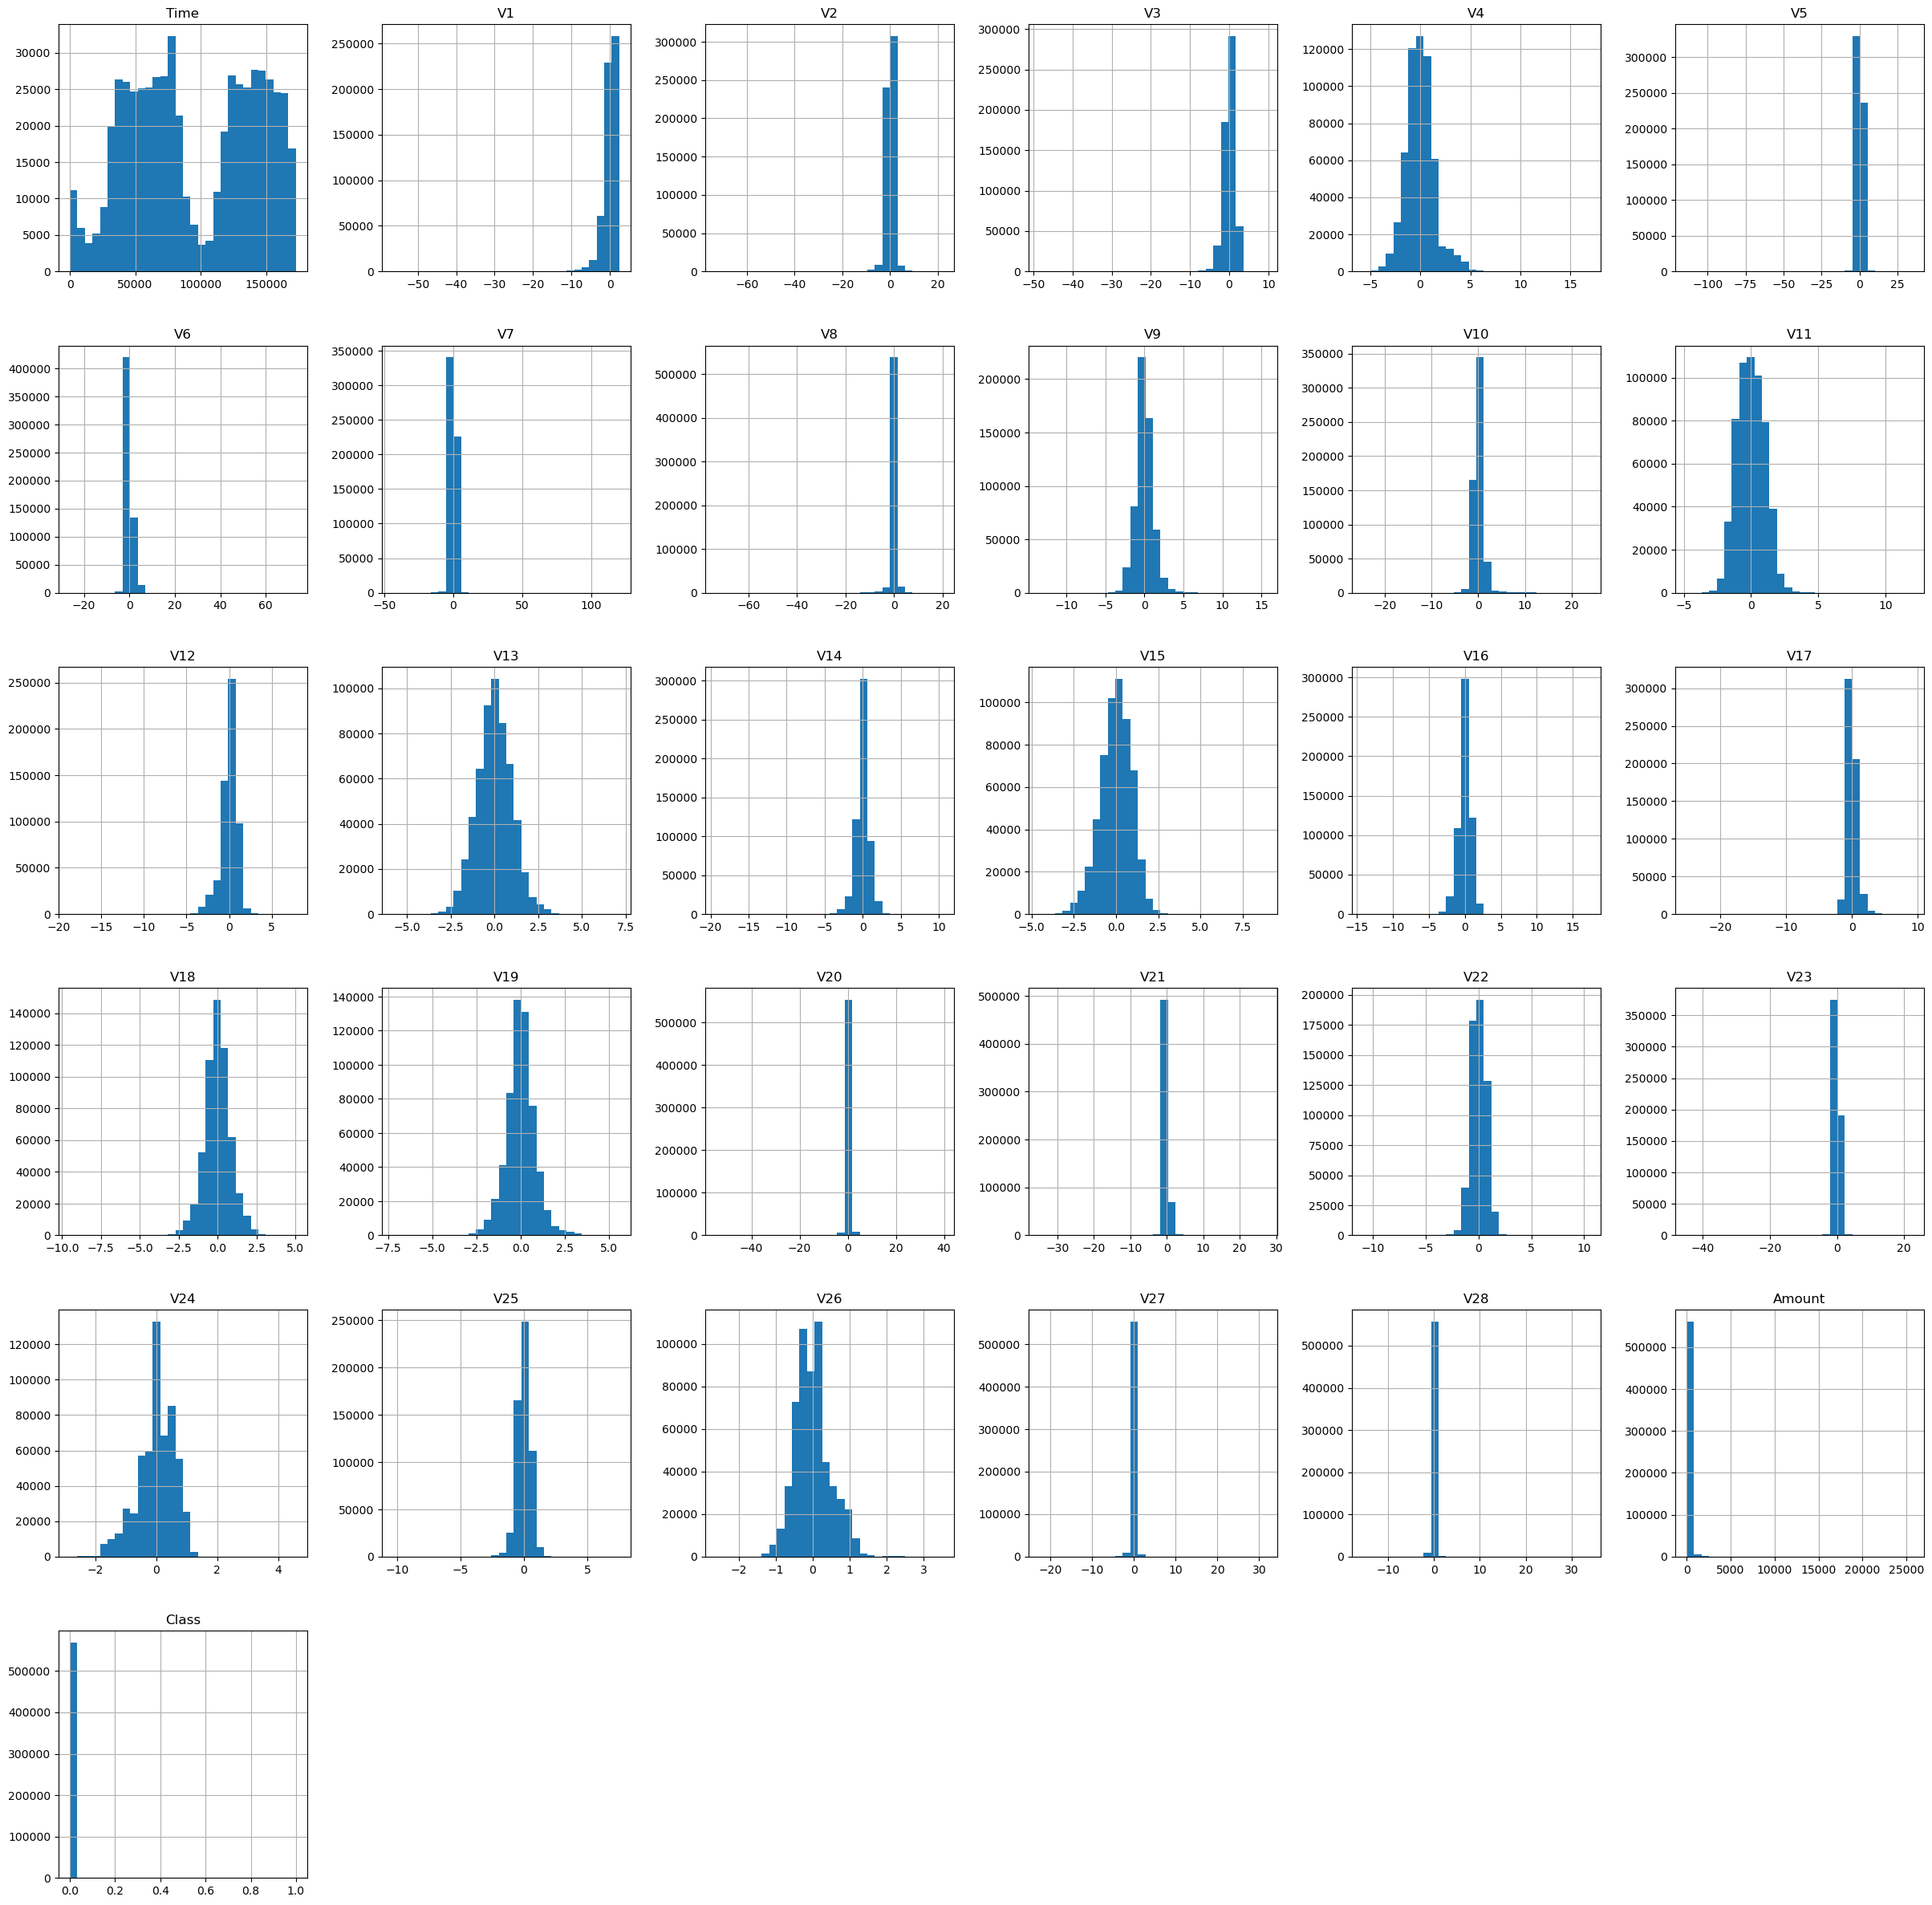

In [3]:
#Histogram Visualization of Credit Card Fraud Dataset Using Pandas
df.hist(bins =30, figsize = (30,30))

In [4]:
#Descriptive Analysis of Credit Card Fraud Dataset
df.describe()

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 6, Finished, Available)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,569614.000000,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,...,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,5.696140e+05,569614.000000,569614.000000
mean,94813.859575,1.181548e-15,3.201355e-16,-1.421849e-15,2.083126e-15,1.000324e-15,1.488111e-15,-5.666239e-16,1.089738e-16,-2.411195e-15,...,1.581717e-16,-3.504726e-16,2.620561e-16,4.473415e-15,5.054509e-16,1.687697e-15,-3.655039e-16,-1.221091e-16,88.349619,0.001727
std,47488.104270,1.958694e+00,1.651307e+00,1.516254e+00,1.415867e+00,1.380246e+00,1.332270e+00,1.237093e+00,1.194352e+00,1.098631e+00,...,7.345234e-01,7.257009e-01,6.244597e-01,6.056465e-01,5.212776e-01,4.822266e-01,4.036321e-01,3.300830e-01,250.119890,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-9.203742e-01,-5.985522e-01,-8.903683e-01,-8.486415e-01,-6.915995e-01,-7.682958e-01,-5.540800e-01,-2.086306e-01,-6.430984e-01,...,-2.283974e-01,-5.423514e-01,-1.618464e-01,-3.545895e-01,-3.171460e-01,-3.269865e-01,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.750000,1.315645e+00,8.037257e-01,1.027198e+00,7.433477e-01,6.119267e-01,3.985671e-01,5.704413e-01,3.273459e-01,5.971397e-01,...,1.863807e-01,5.285544e-01,1.476421e-01,4.395270e-01,3.507156e-01,2.409546e-01,9.104579e-02,7.828043e-02,77.167500,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 7, Finished, Available)

<Axes: >

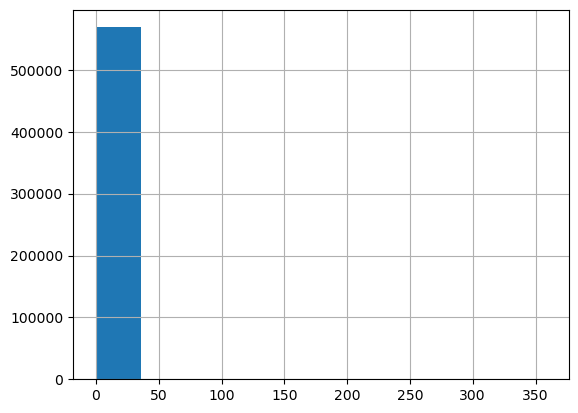

In [5]:
#Applying RobustScaler to Amount Data for feature Scaling

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler


df_new = df.copy()
df_new['Amount'] = RobustScaler().fit_transform(df_new['Amount'].to_numpy().reshape(-1,1))
df_new ['Amount'].hist()

In [6]:
#Descriptive Analysis of Scaled Amounts in Credit Card Fraud Dataset
df_new['Amount'].describe()

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 8, Finished, Available)

count    569614.000000
mean          0.927091
std           3.494881
min          -0.307402
25%          -0.229154
50%           0.000000
75%           0.770846
max         358.670626
Name: Amount, dtype: float64

In [7]:
#Time Normalization in Credit Card Fraud Detection Dataset
time = df_new['Time']
df_new ['Time'] = (time - time.min())/(time.max()-time.min())
df_new

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 9, Finished, Available)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.043515,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.293429,1
1,0.043555,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,-0.293429,1
2,0.043607,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,-0.293429,1
3,0.043654,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,-0.293429,1
4,0.043700,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,-0.293429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569609,0.492540,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,...,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,-0.293429,0
569610,0.492552,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,...,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,-0.293429,0
569611,0.492575,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,...,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,-0.293429,0
569612,0.492586,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,...,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,-0.293429,0


In [8]:
import numpy as np

#Partitioning Credit Card Fraud Dataset into Training, Testing, and Validation Sets"
train, test, val = df_new[:230000], df_new[230000:242000], df_new[242000:]

#Analyzing the Number of Instances for Each Class in Training, Testing, and Validation Sets"
print(train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts())

#Examining the Size of Training, Testing, and Validation Sets in Credit Card Fraud Detection
print(train.shape, test.shape, val.shape)

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 10, Finished, Available)

Class
0    229508
1       492
Name: count, dtype: int64 Class
0    12000
Name: count, dtype: int64 Class
0    327122
1       492
Name: count, dtype: int64
(230000, 31) (12000, 31) (327614, 31)


In [9]:
#Converting Training, Testing, and Validation Sets for Machine Learning"
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()

#NumPy Array Creation for Training, Testing, and Validation Sets
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]

#Checking Dimensions of Machine Learning Input and Output Arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape)

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 11, Finished, Available)

(230000, 30) (230000,) (12000, 30) (12000,) (327614, 30) (327614,)


In [10]:
#Assessing Performance of the Logitsitc Regression Model on the Training Set"
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 12, Finished, Available)

2024-01-03:16:50:24,143 WARNING  [tracking_store.py:153] log_inputs not supported
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991217391304348

In [11]:
#Evaluating the Logistic Regression Model Performance on Validation Set using Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val,logistic_model.predict(x_val),
target_names=['Non Fraud Deals', 'Fraudulent Deals']))

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 13, Finished, Available)

2024-01-03:16:50:41,817 WARNING  [tracking_store.py:153] log_inputs not supported


                  precision    recall  f1-score   support

 Non Fraud Deals       1.00      1.00      1.00    327122
Fraudulent Deals       0.85      0.67      0.75       492

        accuracy                           1.00    327614
       macro avg       0.92      0.83      0.87    327614
    weighted avg       1.00      1.00      1.00    327614



In [12]:
#Assessing Performance on Credit Card Fraud Detection Validation Set using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_jobs=1)
rf.fit(x_train, y_train)
print(classification_report(y_val,rf.predict(x_val),target_names=['Non Fraud Deals', 'Fraudulent Deals']))

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 14, Finished, Available)

2024-01-03:16:50:43,471 WARNING  [tracking_store.py:153] log_inputs not supported


2024-01-03:16:51:17,489 WARNING  [tracking_store.py:153] log_inputs not supported


                  precision    recall  f1-score   support

 Non Fraud Deals       1.00      1.00      1.00    327122
Fraudulent Deals       0.83      0.58      0.68       492

        accuracy                           1.00    327614
       macro avg       0.92      0.79      0.84    327614
    weighted avg       1.00      1.00      1.00    327614



In [13]:
#Assessing Performance on Credit Card Fraud Detection Validation Set using Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_c = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0)
gb_c.fit(x_train, y_train)
print(classification_report(y_val,gb_c.predict(x_val),target_names=['Non Fraud Deals', 'Fraudulent Deals']))

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 15, Finished, Available)

2024-01-03:16:51:20,504 WARNING  [tracking_store.py:153] log_inputs not supported


2024-01-03:16:52:19,700 WARNING  [tracking_store.py:153] log_inputs not supported


                  precision    recall  f1-score   support

 Non Fraud Deals       1.00      1.00      1.00    327122
Fraudulent Deals       0.72      0.69      0.70       492

        accuracy                           1.00    327614
       macro avg       0.86      0.84      0.85    327614
    weighted avg       1.00      1.00      1.00    327614



In [14]:
#Evaluating Model Performance on Validation Set using Linear Support Vector Classifier
from sklearn.svm import LinearSVC
sv_c = LinearSVC(class_weight='balanced')
sv_c.fit(x_train, y_train)
print(classification_report(y_val,sv_c.predict(x_val),target_names=['Non Fraud Deals', 'Fraudulent Deals']))

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 16, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
2024-01-03:16:52:22,20 WARNING  [tracking_store.py:153] log_inputs not supported
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


2024-01-03:16:53:16,412 WARNING  [tracking_store.py:153] log_inputs not supported


                  precision    recall  f1-score   support

 Non Fraud Deals       1.00      1.00      1.00    327122
Fraudulent Deals       0.74      0.80      0.77       492

        accuracy                           1.00    327614
       macro avg       0.87      0.90      0.88    327614
    weighted avg       1.00      1.00      1.00    327614



In [15]:
#Analyzing Model Performance on Validation Set using Multilayer Perceptron Classifier

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)
mlp.fit(x_train, y_train)
print(classification_report(y_val,mlp.predict(x_val),target_names=['Non Fraud Deals', 'Fraudulent Deals']))

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 17, Finished, Available)

2024-01-03:16:53:18,743 WARNING  [tracking_store.py:153] log_inputs not supported


2024-01-03:16:54:00,872 WARNING  [tracking_store.py:153] log_inputs not supported


                  precision    recall  f1-score   support

 Non Fraud Deals       1.00      1.00      1.00    327122
Fraudulent Deals       0.84      0.94      0.89       492

        accuracy                           1.00    327614
       macro avg       0.92      0.97      0.94    327614
    weighted avg       1.00      1.00      1.00    327614



In [16]:
#Evaluating Model Performance on Validation Set using Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print(classification_report(y_val,dt.predict(x_val),target_names=['Non Fraud Deals', 'Fraudulent Deals']))

StatementMeta(, 4050182d-aec9-4f99-9d9c-317c5a9ea2f5, 18, Finished, Available)

2024-01-03:16:54:02,523 WARNING  [tracking_store.py:153] log_inputs not supported


2024-01-03:16:54:32,432 WARNING  [tracking_store.py:153] log_inputs not supported


                  precision    recall  f1-score   support

 Non Fraud Deals       1.00      0.91      0.95    327122
Fraudulent Deals       0.02      1.00      0.03       492

        accuracy                           0.91    327614
       macro avg       0.51      0.96      0.49    327614
    weighted avg       1.00      0.91      0.95    327614

